<a href="https://colab.research.google.com/github/ajaytech002/deep_learning/blob/master/imdb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMDB Classification


---

## Contents


In [3]:
from keras.datasets import imdb

Using TensorFlow backend.


In [4]:
(train_data,train_labels), (test_data, test_labels)  = imdb.load_data(num_words = 10000)

17465344/17464789 [==============================] - 1s 0us/step


In [5]:
train_data

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

In [6]:
word_index = imdb.get_word_index()

1646592/1641221 [==============================] - 0s 0us/step


In [7]:
train_data

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

In [0]:
# get the inverse key map

word_index_reverse = {value : key for key,value in word_index.items()}

In [0]:
# given a coded review (in a list) decode it to a text review
def decode_review(review_code) :
  
  decoded_review = " "
  
  for code in review_code :
    print(code, code-3)
    
    decoded_review = decoded_review + " " + word_index_reverse.get(code-3,"?")
    
  return decoded_review

In [0]:
import numpy as np

def one_hot_encode(sequences,dim=10000) :
  results = np.zeros((len(sequences), dim))
  for i, sequence in enumerate(sequences) :
    results[i,sequence] = 1
  
  return results

In [0]:
x_train = one_hot_encode(train_data)
x_test = one_hot_encode(test_data)

In [0]:
y_train = train_labels.astype("float32")
y_test  = test_labels.astype("float32")

In [0]:
from keras import models
from keras import layers

In [18]:
model = models.Sequential()
model.add(layers.Dense(16,activation="relu",input_shape=(10000,)))
model.add(layers.Dense(16,activation="relu"))
model.add(layers.Dense(1,activation="sigmoid"))

In [19]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [21]:
history = model.fit(x_train, y_train,
                    epochs = 20)

Epoch 1/20
25000/25000 [==============================] - 5s 196us/step - loss: 0.0325 - acc: 0.9879
Epoch 2/20
25000/25000 [==============================] - 5s 197us/step - loss: 0.0309 - acc: 0.9886
Epoch 3/20
25000/25000 [==============================] - 4s 179us/step - loss: 0.0277 - acc: 0.9906
Epoch 4/20
25000/25000 [==============================] - 5s 182us/step - loss: 0.0231 - acc: 0.9918
Epoch 5/20
25000/25000 [==============================] - 5s 184us/step - loss: 0.0211 - acc: 0.9932
Epoch 6/20
25000/25000 [==============================] - 5s 181us/step - loss: 0.0140 - acc: 0.9952
Epoch 7/20
25000/25000 [==============================] - 5s 181us/step - loss: 0.0110 - acc: 0.9965
Epoch 8/20
25000/25000 [==============================] - 5s 182us/step - loss: 0.0082 - acc: 0.9976
Epoch 9/20
25000/25000 [==============================] - 5s 184us/step - loss: 0.0058 - acc: 0.9983
Epoch 10/20
25000/25000 [==============================] - 5s 182us/step - loss: 0.0033 - a

In [24]:
model.predict(x_test)

array([[0.        ],
       [1.        ],
       [1.        ],
       ...,
       [0.        ],
       [0.        ],
       [0.99999976]], dtype=float32)

In [25]:
y_test

array([0., 1., 1., ..., 0., 0., 0.], dtype=float32)

In [0]:
y_pred = model.predict(x_test) > 0.5

In [0]:
y_pred = y_pred.astype(int)

In [29]:
y_pred

array([[0],
       [1],
       [1],
       ...,
       [0],
       [0],
       [1]])

In [0]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [31]:
confusion_matrix(y_test, y_pred)

array([[10733,  1767],
       [ 2155, 10345]])

In [33]:
accuracy_score(y_test, y_pred)

0.84312

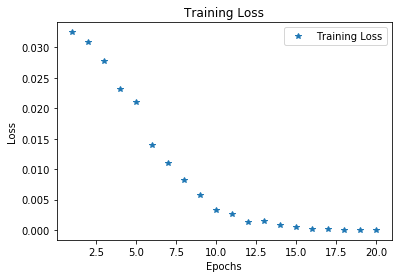

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline

x_axis_epochs = range(1,21)
loss = history.history["loss"]

plt.plot(x_axis_epochs, loss,"*", label = "Training Loss")
plt.title("Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()